### Imports

In [35]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Normalization
from sklearn import preprocessing

# Mutual Information
from sklearn.feature_selection import mutual_info_regression

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models
import sklearn.model_selection as skms
from sklearn import neighbors
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Model Testing
from sklearn import metrics

print("Setup Complete")

Setup Complete


In [36]:
print("Loading Data...")

grad_data = pd.read_csv("./data/graduation_rate.csv")

print("Data Loaded")

Loading Data...
Data Loaded


### Data Preparation

In [37]:
grad_data.head()

,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
0,22,1625,high school,40999,3.0,3.1,7
1,29,2090,associate's degree,75817,4.0,3.4,5
2,30,2188,bachelor's degree,82888,4.0,3.9,3
3,33,2151,associate's degree,93518,4.0,3.7,5
4,29,2050,associate's degree,79153,4.0,3.4,6


In [38]:
grad_data.dtypes

ACT composite score              int64
SAT total score                  int64
parental level of education     object
parental income                  int64
high school gpa                float64
college gpa                    float64
years to graduate                int64
dtype: object

#### Data has no Missing Values

In [39]:
grad_data.isna().sum()

ACT composite score            0
SAT total score                0
parental level of education    0
parental income                0
high school gpa                0
college gpa                    0
years to graduate              0
dtype: int64

#### Rename Attributes to be more workable

In [40]:
attr_names = {
    "ACT composite score": "ACT",
    "SAT total score": "SAT",
    "parental level of education": "par_education",
    "parental income": "par_income",
    "high school gpa": "hs_gpa",
    "college gpa": "college_gpa",
    "years to graduate": "years_to_grad",
}

grad_data.rename(columns=attr_names, inplace=True)

In [41]:
grad_data.columns

Index(['ACT', 'SAT', 'par_education', 'par_income', 'hs_gpa', 'college_gpa',
       'years_to_grad'],
      dtype='object')

#### Normalize Data

In [42]:
par_edu = grad_data['par_education']
grad_data.drop(columns=['par_education'], inplace=True)

In [43]:
scaled_data = preprocessing.normalize(grad_data.values)
scaled_grad_data = pd.DataFrame(scaled_data, columns=grad_data.columns)

scaled_grad_data.describe()

,ACT,SAT,par_income,hs_gpa,college_gpa,years_to_grad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.000465,0.032499,0.999404,0.000060,0.000055,0.000084
std,0.000170,0.011601,0.000546,0.000021,0.000018,0.000047
min,0.000225,0.016462,0.993565,0.000031,0.000029,0.000026
25%,0.000355,0.025049,0.999335,0.000047,0.000042,0.000054
50%,0.000421,0.029506,0.999564,0.000055,0.000050,0.000069
75%,0.000523,0.036456,0.999686,0.000068,0.000061,0.000100
max,0.001682,0.113251,0.999864,0.000210,0.000184,0.000420


In [44]:
grad_data['par_education'] = par_edu
scaled_grad_data['par_education'] = par_edu

In [45]:
grad_data.columns

Index(['ACT', 'SAT', 'par_income', 'hs_gpa', 'college_gpa', 'years_to_grad',
       'par_education'],
      dtype='object')

In [46]:
scaled_grad_data.columns

Index(['ACT', 'SAT', 'par_income', 'hs_gpa', 'college_gpa', 'years_to_grad',
       'par_education'],
      dtype='object')

### Parental Education

In [47]:
par_edu_data = grad_data["par_education"].value_counts()
par_edu_data

some college          232
high school           207
some high school      180
associate's degree    176
bachelor's degree     124
master's degree        81
Name: par_education, dtype: int64

In [48]:
par_edu_data.index[0]

'some college'

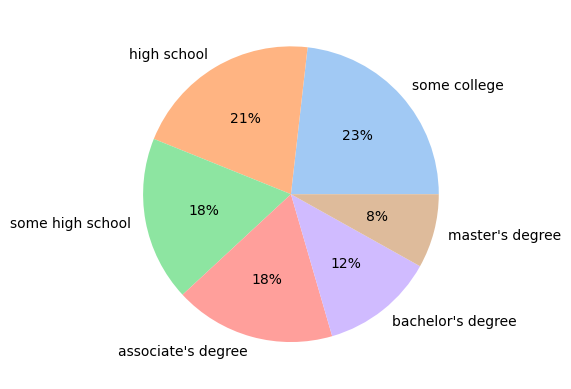

In [49]:
colors = sns.color_palette('pastel')[0:6]

plt.pie(par_edu_data, labels=par_edu_data.index, colors=colors, autopct='%.0f%%')
plt.show()

### Parental Income

In [50]:
grad_data["par_income"].describe()

count      1000.00000
mean      67377.85200
std       18827.33105
min       18906.00000
25%       54269.75000
50%       67842.50000
75%       80465.50000
max      124470.00000
Name: par_income, dtype: float64

<AxesSubplot:ylabel='Frequency'>

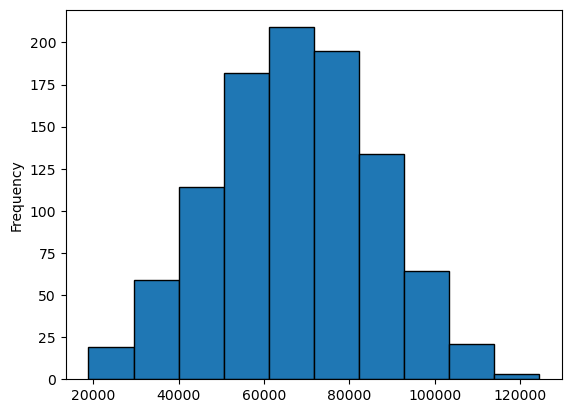

In [51]:
grad_data["par_income"].plot(kind='hist', edgecolor='black')

### Mutual Information

In [52]:
X = grad_data.copy()
y = X.pop('years_to_grad')

scaled_X = scaled_grad_data.copy()
scaled_y = scaled_X.pop('years_to_grad')

for colname, scaled_colname in zip(X.select_dtypes('object'), scaled_X.select_dtypes('object')):
    X[colname], _ = X[colname].factorize()
    scaled_X[scaled_colname], _ = scaled_X[scaled_colname].factorize()
    
discrete_features = X.dtypes == int
scaled_discrete_features = scaled_X.dtypes == int

In [53]:
scaled_discrete_features

ACT              False
SAT              False
par_income       False
hs_gpa           False
college_gpa      False
par_education    False
dtype: bool

In [54]:
scaled_X.dtypes

ACT              float64
SAT              float64
par_income       float64
hs_gpa           float64
college_gpa      float64
par_education      int64
dtype: object

In [55]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name='MI Scores', index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [56]:
mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores

college_gpa      0.191064
par_income       0.082630
par_education    0.015424
ACT              0.004786
SAT              0.000000
hs_gpa           0.000000
Name: MI Scores, dtype: float64

In [57]:
scaled_mi_scores = make_mi_scores(scaled_X, scaled_y, scaled_discrete_features)
scaled_mi_scores

hs_gpa           0.672476
college_gpa      0.612050
SAT              0.534399
par_income       0.514931
ACT              0.408909
par_education    0.138477
Name: MI Scores, dtype: float64

In [58]:
def plot_mi_scores(ax, name, score):
    score = score.sort_values(ascending=True)
    width = np.arange(len(score))
    ticks = list(score.index)
    ax.barh(width, score)
    ax.set_yticks(width, ticks, rotation=45)
    ax.set_title(name)

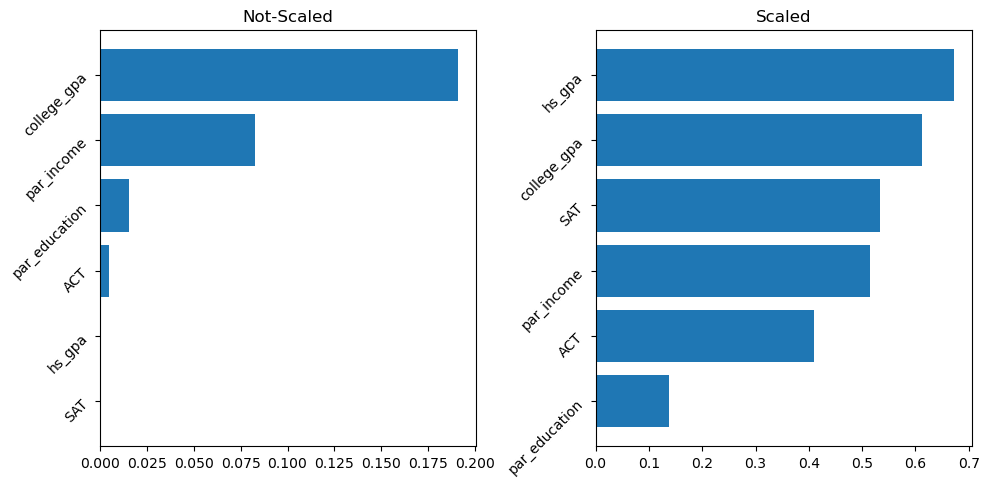

In [59]:
scores = {
    "Not-Scaled": mi_scores,
    "Scaled": scaled_mi_scores,
}

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for ax, (name, score) in zip(axes, scores.items()):
    plot_mi_scores(ax, name, score)
    
fig.tight_layout()

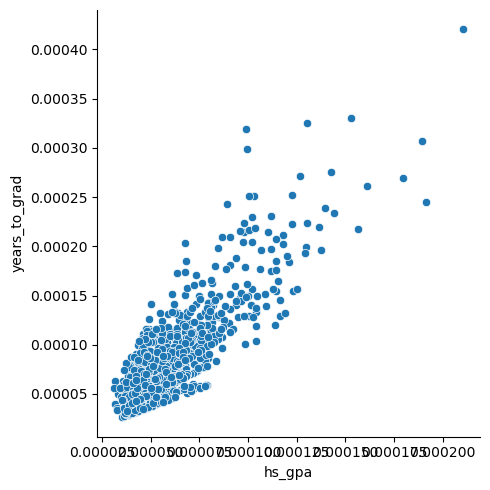

In [72]:
sns.relplot(x='hs_gpa', y='years_to_grad', data=scaled_grad_data)
plt.tight_layout()

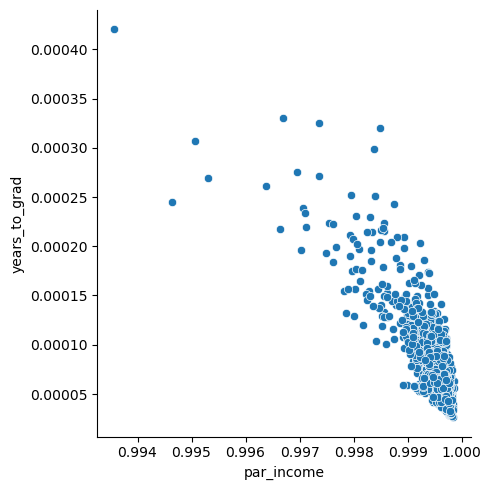

In [61]:
sns.relplot(x='par_income', y='years_to_grad', data=scaled_grad_data)

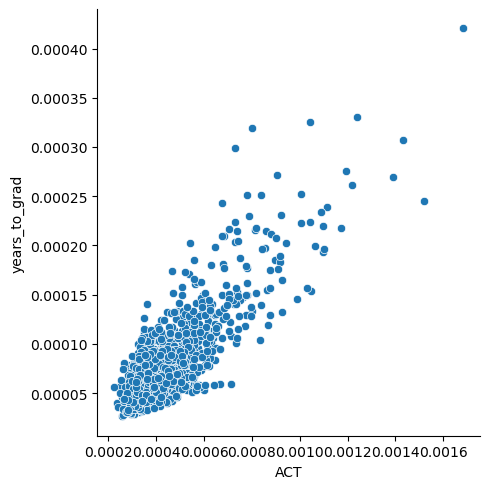

In [62]:
sns.relplot(x='ACT', y='years_to_grad', data=scaled_grad_data)

In [63]:
scaled_grad_data.columns

Index(['ACT', 'SAT', 'par_income', 'hs_gpa', 'college_gpa', 'years_to_grad',
       'par_education'],
      dtype='object')

In [71]:
scaled_grad_data.drop(columns='par_education', inplace=True)
scaled_grad_data.drop(columns='college_gpa', inplace=True)

KeyError: "['par_education'] not found in axis"

In [65]:
X = scaled_grad_data.copy()
y = X.pop('years_to_grad')

In [66]:
X_train, X_test, y_train, y_test = skms.train_test_split(X, y, test_size=.2)

In [67]:
models = {
    'KNN': neighbors.KNeighborsRegressor(n_neighbors=5),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=0.1),
    'Lasso': Lasso(alpha=0.1),
}

predictions = []
results = []

for name, model in models.items():
    fit = model.fit(X_train, y_train)
    preds = fit.predict(X_test)
    predictions.append(preds)
    score = metrics.mean_squared_error(y_test, preds)
    results.append(score)
    print(name, score)  

KNN 7.861102524414514e-10
LinearRegression 7.080564192636703e-10
Ridge 1.0308238252330672e-09
Lasso 1.9984537036125163e-09


In [68]:
score_df = pd.DataFrame(columns=["actual", "preds", "difference", "percent_off"])
score_df["actual"] = y_test
score_df["preds"] = preds
score_df["difference"] = preds - y_test
score_df["percent_off"] = np.absolute(score_df["difference"] / score_df["actual"]) * 100
score_df

,actual,preds,difference,percent_off
78,0.000107,0.000084,-0.000022,20.863754
183,0.000041,0.000084,0.000043,104.383836
773,0.000065,0.000084,0.000019,29.112705
155,0.000067,0.000084,0.000018,26.587551
719,0.000043,0.000084,0.000041,95.489797
...,...,...,...,...
321,0.000090,0.000084,-0.000006,6.296280
459,0.000063,0.000084,0.000021,33.136338
644,0.000041,0.000084,0.000043,104.809224
508,0.000058,0.000084,0.000027,46.265144
